In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.dates as mdates
import scipy.stats as st
from datetime import datetime
import warnings 
%matplotlib inline 

In [2]:
#Read the clean data file and load to the dataframe
df = pd.read_csv('data_clean.csv', parse_dates=['First_Payment_Date', 'Maturity_Date'])
df.head()

,First_Payment_Date,Maturity_Date,Loan_Amount,Zip,Property_Value,Year_Built,Net_Operating_Income,Effective_Gross_Income,Total_Operating_Expenses,Maintenance_Expense,Taxes_Expense,Insurance_Expense,Utilities_Expense,Payroll_Expense,Property_Age
0,2017-06-01,2022-05-01,2143864.02,60077,3003400.24,1965,153643.96,282027.80,125597.78,18793.51,41580.76,9110.30,11233.91,12215.12,52
1,2017-06-01,2037-05-01,1445991.78,33441,1798349.30,1960,105282.69,180649.26,75213.72,14200.86,32705.82,13001.24,0.00,0.00,57
2,2017-06-01,2037-05-01,2725017.88,94597,1653153.29,1959,230180.51,305261.44,71830.08,11574.56,39049.76,3869.46,381.04,0.00,58
3,2017-07-01,2037-06-01,4203448.93,95670,7554077.66,1976,509272.80,890801.66,417618.92,82308.66,51614.93,11441.55,25899.44,104574.43,41
4,2017-06-01,2027-05-01,872183.47,90008,1306139.10,1952,68206.10,101021.26,34641.78,7161.38,11057.87,3008.81,6592.98,0.00,65


In [3]:
warnings.simplefilter('ignore')

**2.a Which state has the highest average loan amount?**

To arrive at solution of this question, I have used another CSV file which contains the data about zip code and corresponding state.

Answer to question is - **Ohio(OH) has the highest average loan amount.**

Below are solution steps-

In [4]:
# read zip data
df_zip_states = pd.read_csv('zip_codes_states.csv')

In [5]:
# Join the dataset with Zip-State csv
df_withState = pd.merge(df, df_zip_states, left_on='Zip', right_on='zip_code', how='left')

In [6]:
#Finding the average loan amount in each state
df_withState.groupby('state',as_index=False)['Loan_Amount'].mean().sort_values('Loan_Amount', ascending=False).head()

,state,Loan_Amount
28,OH,1.884981e+07
36,UT,1.810212e+07
1,AR,1.409158e+07
9,GA,1.270288e+07
21,NC,1.200966e+07


**2.b Which state has the highest taxes as a % of property value?**

To provide the solution of this, question I have considered the observation for which Taxes_Expense and Property_Value are not 0.

Answer to question is - **New Jersey(NJ) has the highest taxes as a % of property value.**

Below are solution steps-

In [7]:
df_taxPerc= df_withState[(df_withState.Property_Value != 0) & (df_withState.Taxes_Expense != 0)]
df_taxPerc['Tax_Percentage'] =(df_taxPerc.Taxes_Expense/df_taxPerc.Property_Value) * 100

In [8]:
df_taxPerc.groupby('state', as_index=False)['Tax_Percentage'].max().sort_values('Tax_Percentage', ascending=False).head()

,state,Tax_Percentage
24,NJ,4.430097
10,IL,4.224919
5,CT,4.218722
35,TX,3.795445
27,NY,3.763692


** 2.C Which variable is the strongest predictor of maintenance expense (as a
percentage of property value)? What is your interpretation of the result?**

I calulated Maintenance_Expense_Percentage using the formula **(Maintenance_Expense/df4.Property_Value) * 100**

Heatmap clearly shows that Maintenance_Expense_Percentage has **positive correlation with Zip code**. This is also verified using groupby function. Hence, I can say that **Zip is the strongest predictor of Maintenance_Expense_Percentage.**

Below are solution steps-

In [9]:
#Calculate the Maintenance_Expense_Percentage
df_expPer = df[(df.Maintenance_Expense != 0) & (df.Property_Value != 0)]
df_expPer['Maintenance_Expense_Percentage'] = (df_expPer.Maintenance_Expense/df_expPer.Property_Value) * 100

In [10]:
df.columns

Index(['First_Payment_Date', 'Maturity_Date', 'Loan_Amount', 'Zip',
       'Property_Value', 'Year_Built', 'Net_Operating_Income',
       'Effective_Gross_Income', 'Total_Operating_Expenses',
       'Maintenance_Expense', 'Taxes_Expense', 'Insurance_Expense',
       'Utilities_Expense', 'Payroll_Expense', 'Property_Age'],
      dtype='object')

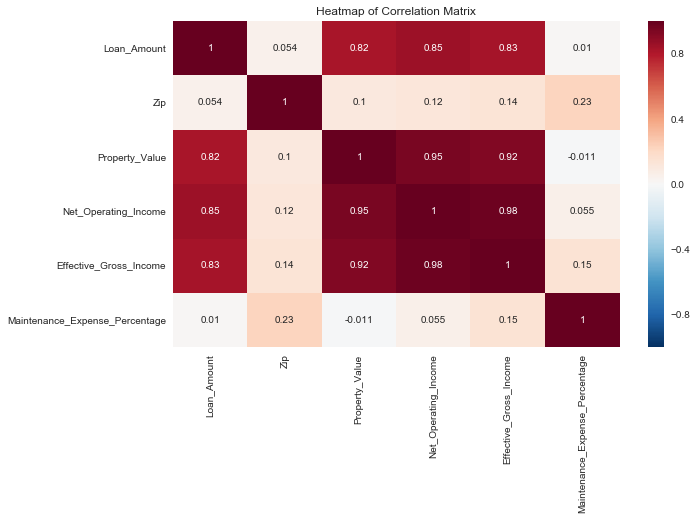

In [11]:
# Find the correlation 
fig, ax = plt.subplots(figsize=(10,6))
col_corr = df_expPer[['Loan_Amount','Zip','Property_Value','Net_Operating_Income',
                      'Effective_Gross_Income','Maintenance_Expense_Percentage']].corr()
sns.heatmap(col_corr, annot=True)
sns.plt.title('Heatmap of Correlation Matrix')

In [12]:
df_expPer.groupby('Zip', as_index=False)['Maintenance_Expense_Percentage', 'Property_Value', 'Insurance_Expense']\
    .mean().sort_values('Maintenance_Expense_Percentage', ascending=False).head()

,Zip,Maintenance_Expense_Percentage,Property_Value,Insurance_Expense
298,49006,4.334328,5264470.73,28227.32
152,20019,3.731146,1775344.41,19788.22
253,35950,3.686872,2988186.82,48902.94
300,49009,3.541646,3518487.97,16014.08
397,76712,3.505580,2230856.05,22675.70


** 2.d What is the median, range and variance in Loan to Value of our loans? What
might this tell us about how deterministic loan amount calculations are?**

I calulated LoanToValue using the formula **Loan_Amount/Property_Value**

**LoanToValue median: 0.6835131322106454**

**LoanToValue range: 126203863.33**

**Loan variance variance: 0.0306686720511161**

As per the D’Agostino and Pearson’s test **null hypothesis is that a sample comes from a normal distribution**. P-value of this test as 3.35441397759e-47. so, we reject the hypothesis. Since LoanToValue is **NOT Normally distributed**, loan amount calculations is **not deterministic.**


Below are solution steps-

In [13]:
#Calculate LoanTo Value
df_loantoVal = df[(df.Loan_Amount != 0) & (df.Property_Value != 0)]
df_loantoVal['LoanToValue'] = (df_loantoVal.Loan_Amount/df_loantoVal.Property_Value)

In [14]:
print('LoanToValue median:',df_loantoVal.LoanToValue.median())
print('LoanToValue range:',df.Loan_Amount.max()-df.Loan_Amount.min())
print('Loan variance variance:',df_loantoVal.LoanToValue.var())


LoanToValue median: 0.6835131322106454
LoanToValue range: 126203863.33
Loan variance variance: 0.0306686720511161


In [15]:
# D’Agostino and Pearson’s Normality test 
k,pval=st.mstats.normaltest(df_loantoVal.LoanToValue)
print("p-value:", pval)

p-value: 3.35441397759e-47


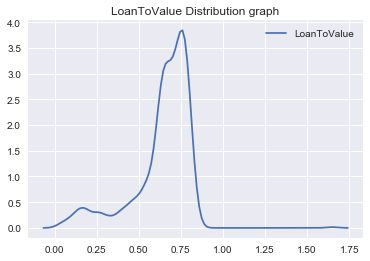

In [16]:
# Distribution ofLoanToValue 
sns.kdeplot(df_loantoVal.LoanToValue)
plt.title("LoanToValue Distribution graph")

** 2.e Do properties with larger valuations exhibit any economies of scale with regard
to expenses? Why do you think this is?**

Yes, properties with larger valuation is **positively correlated with expenses with Pearson coefficient as 0.72**. Lager properties will have larger expanses.

Below are solution steps-

In [17]:
df_high_value_properties = df[df.Property_Value > df.Property_Value.mean()]#create a dataframe of larger properties
df_high_value_properties ['Total_Expenses'] = df.Total_Operating_Expenses + df.Maintenance_Expense \
        + df.Taxes_Expense + df.Insurance_Expense + df.Utilities_Expense + df.Payroll_Expense

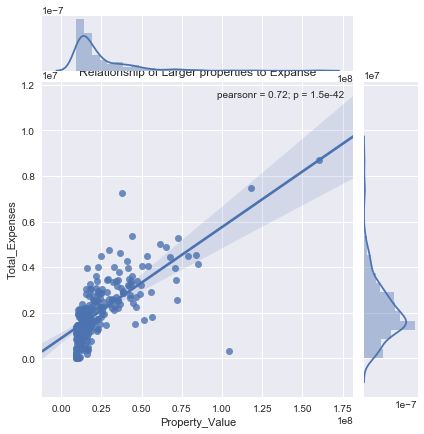

In [18]:
sns.jointplot(data=df_high_value_properties, x='Property_Value', y='Total_Expenses', kind='reg')
plt.title("Relationship of Larger properties to Expanse")

# GRAPHS

**3.A. Expense ratio (Total Operating Expenses/ Effective Gross Income) vs state**

In [19]:
df_exp = df_withState[(df_withState.Total_Operating_Expenses != 0) & (df_withState.Effective_Gross_Income != 0)]
df_exp['Expense_ratio'] = df_exp.Total_Operating_Expenses/df_exp.Effective_Gross_Income

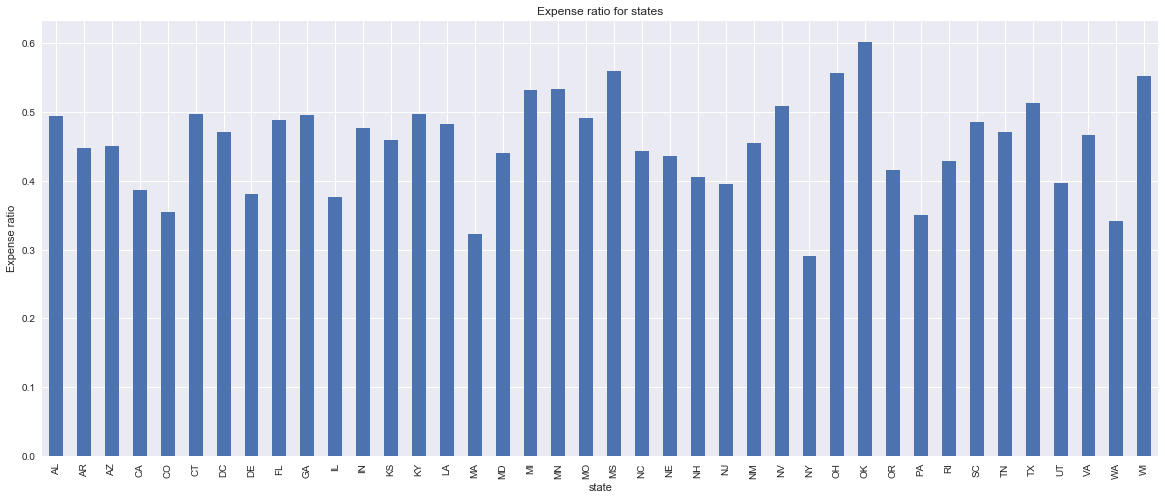

In [20]:
fig, ax = plt.subplots(figsize=(20,8))
df_exp.groupby('state')['Expense_ratio'].mean().plot.bar()
plt.title("Expense ratio for states")
plt.ylabel('Expense ratio')

**3B. Relationship between age of property and expenses**

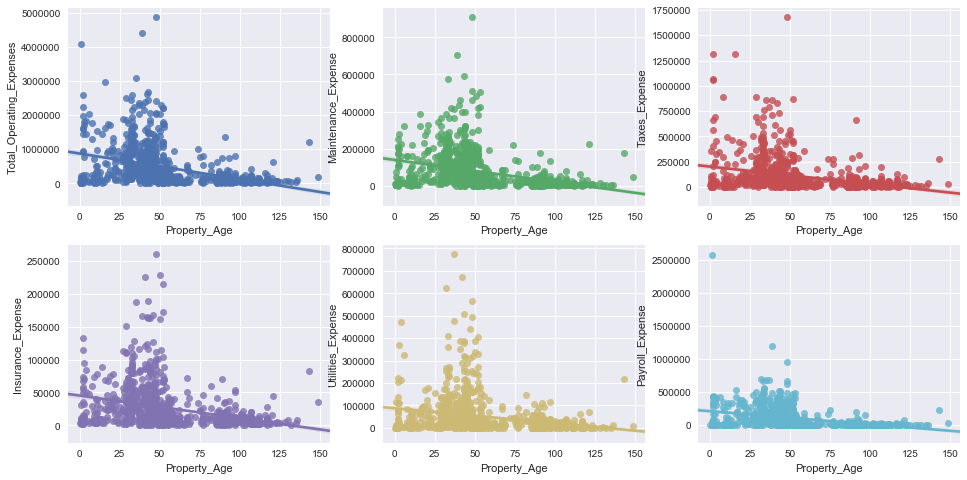

In [21]:
fig , ax1 = plt.subplots( nrows=2, ncols=3, figsize=(16,8))
sns.regplot('Property_Age', 'Total_Operating_Expenses', data=df, ax=ax1[0,0])
sns.regplot('Property_Age', 'Maintenance_Expense', data=df, ax=ax1[0,1])
sns.regplot('Property_Age', 'Taxes_Expense', data=df, ax=ax1[0,2])
sns.regplot('Property_Age', 'Insurance_Expense', data=df, ax=ax1[1,0])
sns.regplot('Property_Age', 'Utilities_Expense', data=df, ax=ax1[1,1])
sns.regplot('Property_Age', 'Payroll_Expense', data=df, ax=ax1[1,2])


**3C. Cumulative loan amount by fiscal quarter**

Since range of cumulative loan amount by fiscal quarter is huge, I considered log of data to show the graph.

In [22]:
# Determine fiscal quarter for each entry
df_cum=df[df.First_Payment_Date != '2000-01-01']# Ignore the default dates
df_cum['Fiscal_Quarter'] = pd.PeriodIndex(df_cum.First_Payment_Date, freq='Q')

In [23]:
# Create Year column for each quater
df_fiscal = df_cum.groupby('Fiscal_Quarter', as_index=False)['Loan_Amount'].sum()
df_fiscal.index = df_fiscal.Fiscal_Quarter.apply(lambda x: str(x)[:4])
df_fiscal.index.name = 'Year'

In [24]:
#Calculate Cumulative loan amount by fiscal quarter
df_fiscal['Quaterly_Cumulative'] = df_fiscal.groupby(df_fiscal.index).cumsum()
df_fiscal

,Fiscal_Quarter,Loan_Amount,Quaterly_Cumulative
Year,,,
2009,2009Q4,1.368424e+06,1.368424e+06
2010,2010Q4,2.780350e+06,2.780350e+06
2011,2011Q1,1.995223e+06,1.995223e+06
2012,2012Q1,2.222332e+06,2.222332e+06
2013,2013Q1,2.779757e+06,2.779757e+06
2014,2014Q1,5.055883e+06,5.055883e+06
2014,2014Q3,3.381014e+06,8.436898e+06
2015,2015Q1,5.620382e+06,5.620382e+06
2015,2015Q2,1.563495e+06,7.183878e+06


In [25]:
df_fiscal.reset_index(inplace=True)
df_fiscal['Year'] = df_fiscal['Year'].astype(np.int) 
df_fiscal.head()

,Year,Fiscal_Quarter,Loan_Amount,Quaterly_Cumulative
0,2009,2009Q4,1368423.96,1368423.96
1,2010,2010Q4,2780350.20,2780350.20
2,2011,2011Q1,1995222.85,1995222.85
3,2012,2012Q1,2222331.89,2222331.89
4,2013,2013Q1,2779757.47,2779757.47


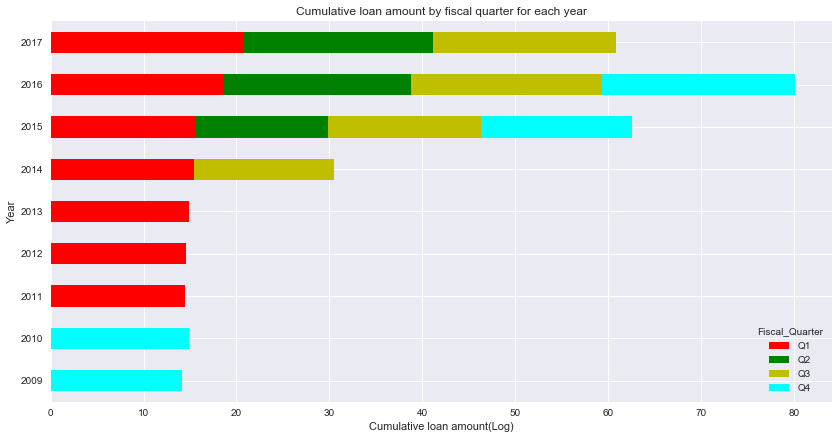

In [26]:
# Plot the graph for Cumulative loan amount by fiscal quarter
df_fiscal_plot = pd.DataFrame()
df_fiscal_plot['Loan_Amount_Log'] = np.log(df_fiscal.Loan_Amount)
df_fiscal_plot['Fiscal_Quarter'] = df_fiscal.Fiscal_Quarter.apply(lambda x: str(x)[4:6])
df_fiscal_plot['Year'] = df_fiscal.Year
df_fiscal_plot.Loan_Amount_Log.replace('-inf',0, inplace=True)
df_fiscal_plot = df_fiscal_plot.pivot(columns='Fiscal_Quarter', values='Loan_Amount_Log', index='Year')
df_fiscal_plot.fillna(0)
fig , ax1 = plt.subplots(figsize=(14,7))
df_fiscal_plot.plot.barh(stacked=True, color= ['r','g','y','aqua'], ax=ax1)
plt.title("Cumulative loan amount by fiscal quarter for each year")
plt.xlabel("Cumulative loan amount(Log)")